In [71]:
# KNN Classification
import pandas as pd
from pandas import read_csv
import numpy as np
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score
from sklearn.neighbors import KNeighborsClassifier

In [72]:
glass = pd.read_csv('glass.csv')
glass

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [73]:
glass.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 214 entries, 0 to 213
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   RI      214 non-null    float64
 1   Na      214 non-null    float64
 2   Mg      214 non-null    float64
 3   Al      214 non-null    float64
 4   Si      214 non-null    float64
 5   K       214 non-null    float64
 6   Ca      214 non-null    float64
 7   Ba      214 non-null    float64
 8   Fe      214 non-null    float64
 9   Type    214 non-null    int64  
dtypes: float64(9), int64(1)
memory usage: 16.8 KB


In [74]:
glass.describe()

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
count,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000,214.000000
mean,1.518365,13.407850,2.684533,1.444907,72.650935,0.497056,8.956963,0.175047,0.057009,2.780374
std,0.003037,0.816604,1.442408,0.499270,0.774546,0.652192,1.423153,0.497219,0.097439,2.103739
min,1.511150,10.730000,0.000000,0.290000,69.810000,0.000000,5.430000,0.000000,0.000000,1.000000
25%,1.516522,12.907500,2.115000,1.190000,72.280000,0.122500,8.240000,0.000000,0.000000,1.000000
50%,1.517680,13.300000,3.480000,1.360000,72.790000,0.555000,8.600000,0.000000,0.000000,2.000000
75%,1.519157,13.825000,3.600000,1.630000,73.087500,0.610000,9.172500,0.000000,0.100000,3.000000
max,1.533930,17.380000,4.490000,3.500000,75.410000,6.210000,16.190000,3.150000,0.510000,7.000000


In [75]:
type(glass)

pandas.core.frame.DataFrame

In [76]:
glass['Type'].value_counts()

2    76
1    70
7    29
3    17
5    13
6     9
Name: Type, dtype: int64

C:\Users\admin\anaconda3\lib\site-packages\seaborn\categorical.py:3717: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
C:\Users\admin\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


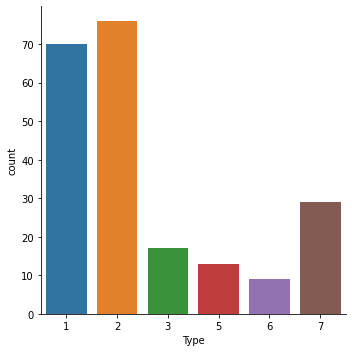

In [77]:
import seaborn as sns
sns.factorplot('Type', data=glass, kind="count")


In [78]:
glass[glass.duplicated()].shape

(1, 10)

In [79]:
glass[glass.duplicated()]

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
39,1.52213,14.21,3.82,0.47,71.77,0.11,9.57,0.0,0.0,1


In [80]:
glass_df = glass.drop_duplicates()

In [81]:
glass_df

,RI,Na,Mg,Al,Si,K,Ca,Ba,Fe,Type
0,1.52101,13.64,4.49,1.10,71.78,0.06,8.75,0.00,0.0,1
1,1.51761,13.89,3.60,1.36,72.73,0.48,7.83,0.00,0.0,1
2,1.51618,13.53,3.55,1.54,72.99,0.39,7.78,0.00,0.0,1
3,1.51766,13.21,3.69,1.29,72.61,0.57,8.22,0.00,0.0,1
4,1.51742,13.27,3.62,1.24,73.08,0.55,8.07,0.00,0.0,1
...,...,...,...,...,...,...,...,...,...,...
209,1.51623,14.14,0.00,2.88,72.61,0.08,9.18,1.06,0.0,7
210,1.51685,14.92,0.00,1.99,73.06,0.00,8.40,1.59,0.0,7
211,1.52065,14.36,0.00,2.02,73.42,0.00,8.44,1.64,0.0,7
212,1.51651,14.38,0.00,1.94,73.61,0.00,8.48,1.57,0.0,7


In [82]:
array=glass_df.values
X = array[:, 0:9]
Y = array[:, 9]


In [83]:
X

array([[ 1.52101, 13.64   ,  4.49   , ...,  8.75   ,  0.     ,  0.     ],
       [ 1.51761, 13.89   ,  3.6    , ...,  7.83   ,  0.     ,  0.     ],
       [ 1.51618, 13.53   ,  3.55   , ...,  7.78   ,  0.     ,  0.     ],
       ...,
       [ 1.52065, 14.36   ,  0.     , ...,  8.44   ,  1.64   ,  0.     ],
       [ 1.51651, 14.38   ,  0.     , ...,  8.48   ,  1.57   ,  0.     ],
       [ 1.51711, 14.23   ,  0.     , ...,  8.62   ,  1.67   ,  0.     ]])

In [84]:
Y

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2., 2.,
       2., 2., 2., 2., 2., 2., 2., 2., 2., 3., 3., 3., 3., 3., 3., 3., 3.,
       3., 3., 3., 3., 3., 3., 3., 3., 3., 5., 5., 5., 5., 5., 5., 5., 5.,
       5., 5., 5., 5., 5., 6., 6., 6., 6., 6., 6., 6., 6., 6., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7., 7.,
       7., 7., 7., 7., 7., 7., 7., 7., 7.])

In [85]:
from sklearn.preprocessing import StandardScaler
stscaler = StandardScaler().fit(X)
X = stscaler.transform(X) 
X 

array([[ 0.87984017,  0.28955813,  1.25723832, ..., -0.14346582,
        -0.35380764, -0.58830108],
       [-0.24381562,  0.59640332,  0.63931074, ..., -0.79020061,
        -0.35380764, -0.58830108],
       [-0.71641202,  0.15454625,  0.6045957 , ..., -0.82534924,
        -0.35380764, -0.58830108],
       ...,
       [ 0.76086485,  1.17327228, -1.86017161, ..., -0.36138732,
         2.94550057, -0.58830108],
       [-0.60735132,  1.19781989, -1.86017161, ..., -0.33326842,
         2.80467644, -0.58830108],
       [-0.40905912,  1.01371278, -1.86017161, ..., -0.23485225,
         3.00585377, -0.58830108]])

In [86]:
num_folds = 10
kfold = KFold(n_splits=10)

In [87]:
model = KNeighborsClassifier(n_neighbors=5)
results = cross_val_score(model, X, Y, cv=kfold)

In [88]:
print(results.mean())

0.5512987012987014


In [89]:
#Grid Search for Algorithm Tuning

In [90]:
# Grid Search for Algorithm Tuning
import numpy
from pandas import read_csv
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV

In [91]:
n_neighbors = numpy.array(range(1,40))
param_grid = dict(n_neighbors=n_neighbors)

In [92]:
model = KNeighborsClassifier()
grid = GridSearchCV(estimator=model, param_grid=param_grid)
grid.fit(X, Y)

GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid={'n_neighbors': array([ 1,  2,  3,  4,  5,  6,  7,  8,  9, 10, 11, 12, 13, 14, 15, 16, 17,
       18, 19, 20, 21, 22, 23, 24, 25, 26, 27, 28, 29, 30, 31, 32, 33, 34,
       35, 36, 37, 38, 39])})

In [93]:
print(grid.best_score_)
print(grid.best_params_)

0.6666666666666667
{'n_neighbors': 2}


In [94]:
#Visualizing the CV results

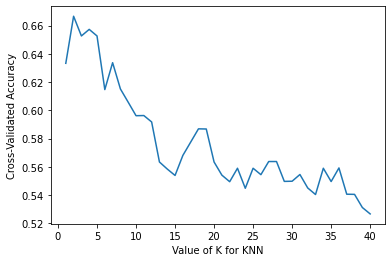

In [95]:
import matplotlib.pyplot as plt 
%matplotlib inline
# choose k between 1 to 41
k_range = range(1, 41)
k_scores = []
# use iteration to caclulator different k in models, then return the average accuracy based on the cross validation
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    scores = cross_val_score(knn, X, Y, cv=5)
    k_scores.append(scores.mean())
# plot to see clearly
plt.plot(k_range, k_scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Cross-Validated Accuracy')
plt.show()

In [96]:
## Final Model
model = KNeighborsClassifier(n_neighbors=2)
results = cross_val_score(model, X, Y, cv=5)

In [97]:
print(results.mean())

0.6666666666666667
